In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/data.csv", index_col=0)
X = dataset.drop(columns=['y'])
y = dataset['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Epoch 1/100
1840/1840 [==============================] - 107s 56ms/step - loss: 1.1104 - accuracy: 0.5104 - val_loss: 3.3575 - val_accuracy: 0.1957
Epoch 2/100
1840/1840 [==============================] - 111s 61ms/step - loss: 0.9797 - accuracy: 0.5727 - val_loss: 3.3754 - val_accuracy: 0.1957
Epoch 3/100
1840/1840 [==============================] - 103s 56ms/step - loss: 0.8630 - accuracy: 0.6204 - val_loss: 3.7634 - val_accuracy: 0.1957
Epoch 4/100
1840/1840 [==============================] - 98s 53ms/step - loss: 0.8402 - accuracy: 0.6283 - val_loss: 3.5153 - val_accuracy: 0.1957
Epoch 5/100
1840/1840 [==============================] - 98s 53ms/step - loss: 0.8101 - accuracy: 0.6388 - val_loss: 3.7226 - val_accuracy: 0.1957
Epoch 6/100
1840/1840 [==============================] - 98s 53ms/step - loss: 0.8815 - accuracy: 0.6160 - val_loss: 3.8273 - val_accuracy: 0.1957
Epoch 7/100
1840/1840 [==============================] - 96s 52ms/step - loss: 0.8458 - accuracy: 0.6268 - val_loss

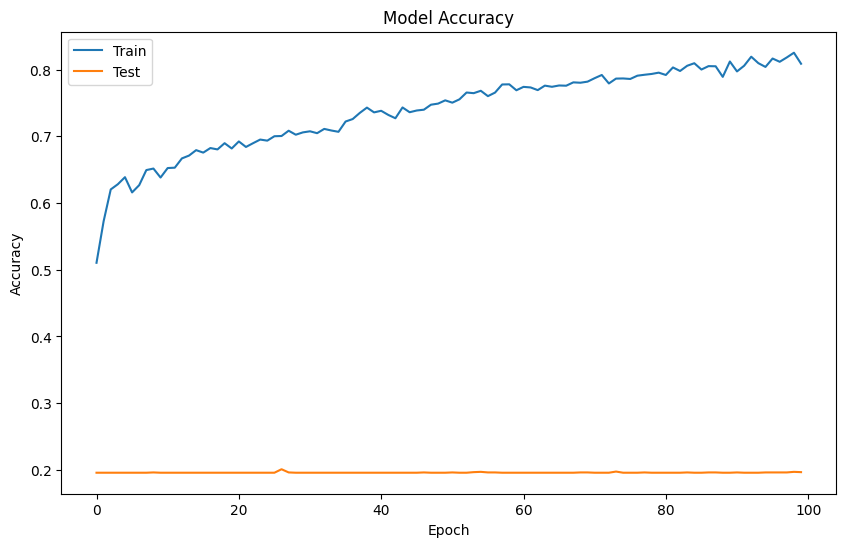

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
lstm_model = Sequential([
    LSTM(units=64, input_shape=(X_train_scaled.shape[1], 1)),
    Dense(6, activation='sigmoid')
])

model = lstm_model


X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test_scaled, y_test), verbose=1)
y_pred = (model.predict(X_test_lstm) > 0.5).astype(int)


_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()